In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_matchs = pd.read_csv("donnees_football\\Match.csv")
df_country = pd.read_csv("donnees_football\\Country.csv")
df_league = pd.read_csv("donnees_football\\League.csv")
df_player_att = pd.read_csv("donnees_football\\Player_Attributes.csv")
df_player = pd.read_csv("donnees_football\\Player.csv")
df_team_attributes = pd.read_csv("donnees_football\\Team_Attributes.csv")
df_team = pd.read_csv("donnees_football\\Team.csv")

Question 4: Quelle équipe a gagné le plus de matchs en une seule saison sur toute la période du jeu de données ?


In [ ]:
def question4():
    """ 
    Renvoie le nom et le score de l'équipe qui a le plus gagné de matchs par saison.

    Returns
    -------
    str[season: str, nom_equipe: str, nb_buts: int]
    """
    gagnants = []
    equipes = {}
    for equipe in df_team['team_api_id']:
        equipes[equipe] = 0

    for saison in df_matchs['season'].unique():
        donnees_travail = df_matchs[df_matchs['season'] == saison]
        equicopy = equipes.copy()
        for i in range (len(donnees_travail)):
            buts_home = donnees_travail['home_team_goal'].iloc[i]
            buts_away = donnees_travail['away_team_goal'].iloc[i]
            team_home = donnees_travail['home_team_api_id'].iloc[i]
            team_away = donnees_travail['away_team_api_id'].iloc[i]
            if  buts_home > buts_away:
                equicopy[team_home] += 1
            elif buts_home < buts_away:
                equicopy[team_away] += 1
        id_gagnant = max(equicopy, key=equicopy.get)
        nom_gagnant = df_team[df_team['team_api_id'] == id_gagnant]['team_long_name'].values[0]
        nb_buts = equicopy[id_gagnant]
        gagnants.append((saison, nom_gagnant, nb_buts))
    victoires = [triple[2] for triple in gagnants]
    indice = victoires.index(max(victoires))
    interest = gagnants[indice]
    rep = f"L'equipe qui a gagne le plus de matchs en une saison de 2008 a 2016 est \
{interest[1]} pour la saison {interest[0]} avec {interest[2]} victoires."
    with open('question4.txt', 'w') as f:
        f.write(rep)
    return rep


In [8]:
question4()

"L'equipe qui a gagne le plus de matchs en une saison de 2008 a 2016 est Juventus pour la saison 2013/2014 avec 33 victoires"

Question 4 en python pur

In [32]:
import csv

def question4pypur():
    with open('donnees_football\\Team.csv', mode='r', newline='', encoding='utf-8') as f:
        lecteur = csv.DictReader(f)
        data_team = [ligne for ligne in lecteur]
    with open('donnees_football\\Match.csv', mode='r', newline='', encoding='utf-8') as f:
        lecteur = csv.DictReader(f)
        data_match = [ligne for ligne in lecteur]

    equipes = {team['team_api_id']: 0 for team in data_team}
    gagnants = []
    saisons = set(match['season'] for match in data_match)

    for saison in saisons:
        donnees_travail = [match for match in data_match if match['season'] == saison]
        equicopy = equipes.copy()
        for match in donnees_travail:
            buts_home = int(match['home_team_goal'])
            buts_away = int(match['away_team_goal'])
            team_home = match['home_team_api_id']
            team_away = match['away_team_api_id']
            if buts_home > buts_away:
                equicopy[team_home] += 1
            elif buts_home < buts_away:
                equicopy[team_away] += 1

        id_gagnant = max(equicopy, key=lambda k: equicopy[k])
        nb_victoires = equicopy[id_gagnant]
        nom_gagnant = next(team['team_long_name'] for team in data_team if team['team_api_id'] == id_gagnant)
        gagnants.append((saison, nom_gagnant, nb_victoires))
    
    victoire_max = max(gagnants, key=lambda x: x[2])
    rep = f"L'equipe qui a gagne le plus de matchs en une saison de 2008 a 2016 est {victoire_max[1]} pour la saison {victoire_max[0]} avec {victoire_max[2]} victoires."
    with open('question4pypur.txt', 'w', encoding='utf-8') as f:
        f.write(rep)
    return rep


In [33]:
question4pypur()

"L'equipe qui a gagne le plus de matchs en une saison de 2008 a 2016 est Juventus pour la saison 2013/2014 avec 33 victoires."

In [34]:
import time

start = time.time()
resultat = question4()
end = time.time()

temps_pandas = end-start

start = time.time()
resultat = question4pypur()
end = time.time()

temps_pypur = end-start

print(f"Temps d'exécution. Pandas: {temps_pandas}s  Pypur: {temps_pypur}s")

Temps d'exécution. Pandas: 0.7104158401489258s  Pypur: 2.895815849304199s


Question 5: Quels sont les 10 joueurs ayant joué le plus de matchs sur toute la période du jeu de données ?

In [ ]:
liste_interet = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 
                'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 
                'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 
                'away_player_10', 'away_player_11']

In [11]:
def question5():
    """
    Renvoie la liste des 10 joueurs qui ont joué le plus de matchs de la saison 2008/2009 à la saison 2015/2016.
    """
    dico = {}
    for i in range(len(df_matchs)):
        for num in liste_interet:
            joueur = df_matchs.loc[i][num]
            if joueur in list(dico.keys()):
                dico[joueur] += 1
            elif not np.isnan(joueur):
                dico[joueur] = 1
    liste_joueurs = []
    liste_finale = []
    for i in range(10):
        j = max(dico)
        liste_joueurs.append(j)
        del dico[j]
    for joueur in liste_joueurs:
        liste_finale.append(df_player[df_player['player_api_id']==joueur].reset_index().at[0,'player_name'])
    rep = f'Les 10 joueurs ayant joue le plus de matchs de 2008 à 2016 sont \
{liste_finale[0]}, {liste_finale[1]}, {liste_finale[2]}, {liste_finale[3]}, {liste_finale[4]}, {liste_finale[5]}, \
{liste_finale[6]}, {liste_finale[7]}, {liste_finale[8]} et {liste_finale[9]}.'
    with open('question5.txt', 'w') as f:
        f.write(rep)
    return rep

In [ ]:
question5()

'Les 10 joueurs ayant joué le plus de matchs de 2008 à 2016 sont Alexandre Azevedo, Rees Greenwood, Fynn Arkenberg, Francisco Afonso, Greg Taylor, Charles Pickel, Tom Davies, Linus Obexer, Jorge Intima et Kamil Jozwiak.'

Question 8: Quelles sont les 3 formations de jeu les plus courantes lors de la saison 2015/2016 ?

In [12]:
liste_positions = [['home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8', 'home_player_X9','home_player_X10','home_player_X11'],['away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11'],['home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11'],['away_player_Y1','away_player_Y2','away_player_Y3','away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7','away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11']]
df_interet = df_matchs[df_matchs['season'] == '2015/2016'].reset_index()


In [17]:
def affichage_dico(dic, n):
    """
    Affiche les clés d'un dictionnaire correspondant aux n plus hautes valeurs.

    Parameters
    -------
    dic: dict[key: int, value: int], n: int
        Le dictionnaire en question.

    Returns
    -------
    list[int]
    """
    couples = [(dic[i], i) for i in range(len(list(dic.keys())))]
    couples.sort(reverse=True)
    return [list(dic.keys())[coup[1]] for coup in couples[:n]]


def affichage_formations(posi, nom):
    """
    Affiche des points (x, y) sur un plan.
    
    Parameters
    -------
    posi: list[tuple[float]]
        Liste de tuples (x, y)
    """
    xval = [pos[0] for pos in posi]
    yval = [pos[1] for pos in posi]
    plt.figure()
    plt.scatter(xval, yval, color='blue', marker='o')

    # Affichage des axes et de la grille
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)

    plt.title(f'Formation en {nom}')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.autoscale(enable=True, axis='both', tight=False)

    plt.savefig(f'{nom}.png')

    plt.show()


In [24]:
def question8():
    """
    Renvoie les 3 formations de jeu les plus courantes de la saison 2015/2016.
    """
    nom_formations = ['4-4-2', '4-5-1', '4-3-3']
    formations = []
    compteur = {}
    for mat in range(len(df_interet)):
        home = []
        away = []
        for i in range(11):
            home.append((df_interet.at[mat, liste_positions[0][i]], df_interet.at[mat, liste_positions[2][i]]))
            away.append((df_interet.at[mat, liste_positions[1][i]], df_interet.at[mat, liste_positions[3][i]]))
        home.sort()
        away.sort()
        for j in [home, away]:
            if j not in formations:
                formations.append(j)
                ind = formations.index(j)
                compteur[ind] = 1
            else:
                ind = formations.index(j)
                compteur[ind] += 1
    rep_finale = ''
    for i in affichage_dico(compteur, 3):
        nb = len(df_interet)
        affichage_formations(formations[i], nom_formations[i-1])
        rep = f'La formation dite en {nom_formations[i-1]} a ete adoptee par une equipe dans {round((compteur[i]/nb)*50)}% des cas.'
        print(rep)
        rep_finale += ' ' + rep
    with open('question8.txt', 'w') as f:
        f.write(rep_finale)

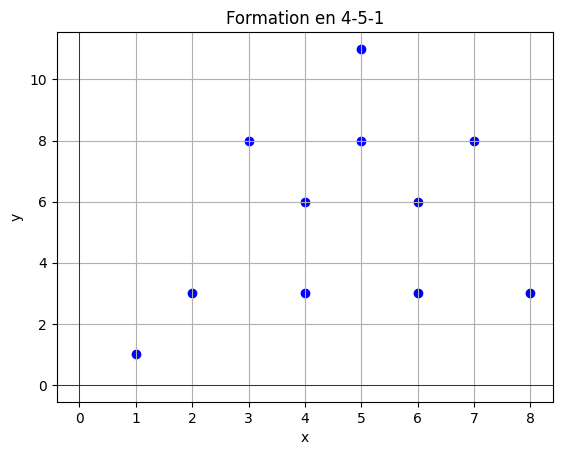

La formation dite en 4-5-1 a ete adoptee par une equipe dans 35% des cas.


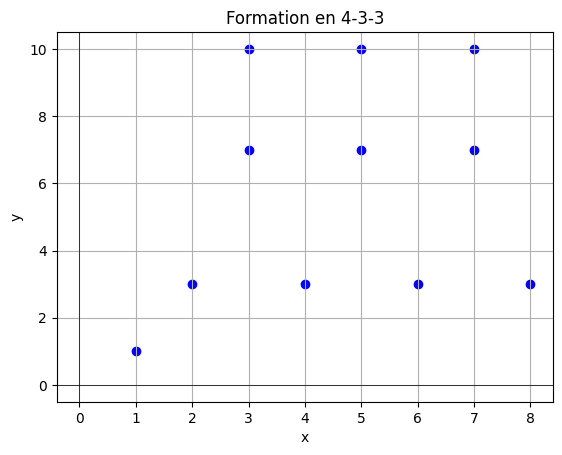

La formation dite en 4-3-3 a ete adoptee par une equipe dans 24% des cas.


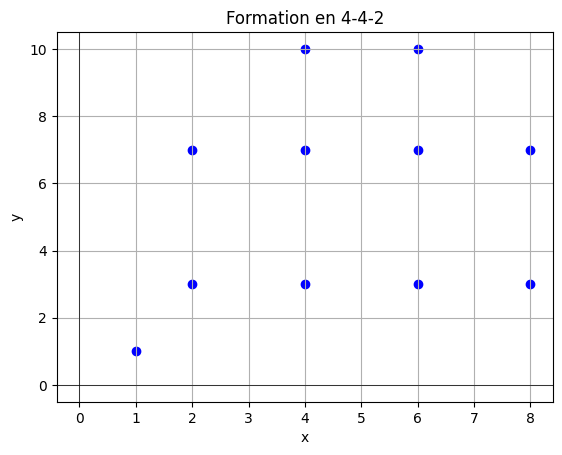

La formation dite en 4-4-2 a ete adoptee par une equipe dans 16% des cas.


In [25]:
question8()

Question 9

In [26]:
formations = [[(np.float64(1.0), np.float64(1.0)), (np.float64(2.0), np.float64(3.0)), (np.float64(3.0), np.float64(8.0)), (np.float64(4.0), np.float64(3.0)), (np.float64(4.0), np.float64(6.0)), (np.float64(5.0), np.float64(8.0)), (np.float64(5.0), np.float64(11.0)), (np.float64(6.0), np.float64(3.0)), (np.float64(6.0), np.float64(6.0)), (np.float64(7.0), np.float64(8.0)), (np.float64(8.0), np.float64(3.0))],
              [(np.float64(1.0), np.float64(1.0)), (np.float64(2.0), np.float64(3.0)), (np.float64(3.0), np.float64(7.0)), (np.float64(3.0), np.float64(10.0)), (np.float64(4.0), np.float64(3.0)), (np.float64(5.0), np.float64(7.0)), (np.float64(5.0), np.float64(10.0)), (np.float64(6.0), np.float64(3.0)), (np.float64(7.0), np.float64(7.0)), (np.float64(7.0), np.float64(10.0)), (np.float64(8.0), np.float64(3.0))],
              [(np.float64(1.0), np.float64(1.0)), (np.float64(2.0), np.float64(3.0)), (np.float64(2.0), np.float64(7.0)), (np.float64(4.0), np.float64(3.0)), (np.float64(4.0), np.float64(7.0)), (np.float64(4.0), np.float64(10.0)), (np.float64(6.0), np.float64(3.0)), (np.float64(6.0), np.float64(7.0)), (np.float64(6.0), np.float64(10.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(8.0), np.float64(7.0))]]


In [28]:
def affiche_bar(dic):
    """
    Affiche un graphique en barre double, prenant en compte les valeurs d'un dictionnaire.

    Parameters
    -------
    dic: dict[key: -, value: tuple[float, float]]
    """
    x = np.arange(3)
    largeur = 0.35  # largeur des barres
    val1 = [dic[i+1][0] for i in range(3)]
    val2 = [dic[i+1][1] for i in range(3)]

    plt.bar(x - largeur/2, val1, width=largeur, label='Buts marqués', color='blue')
    plt.bar(x + largeur/2, val2, width=largeur, label='Buts encaissés', color='red')

    plt.xlabel('Formations')
    plt.ylabel('Buts')
    plt.title("Buts marqués et encaissés en moyenne \nselon la formation de l'équipe")
    plt.xticks(x, ['4-5-1', '4-3-3', '4-4-2'])
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.savefig('question9.png')

    plt.show()

In [31]:
def question9():
    """
    Affiche un graphique en barre double résumant le nombre moyen de buts marqués et encaissés par les équipe selon la formation choisie.
    
    Return
    -------
    str[int]
    """
    res = {1:(0, 0), 2:(0, 0), 3:(0, 0)}
    compte = [0, 0, 0]
    for mat in range(len(df_interet)):
        home = []
        away = []
        for i in range(11):
            home.append((df_interet.at[mat, liste_positions[0][i]], df_interet.at[mat, liste_positions[2][i]]))
            away.append((df_interet.at[mat, liste_positions[1][i]], df_interet.at[mat, liste_positions[3][i]]))
        home.sort()
        away.sort()
        for j in [home, away]:
            if j in formations:
                indice = formations.index(j)
                score = res[indice + 1]
                compte[indice - 1] += 1
                home_score = df_interet.at[mat, 'home_team_goal']
                away_score = df_interet.at[mat, 'away_team_goal']
                if j == home:
                    res[formations.index(j) + 1] = (score[0] + home_score, score[1] + away_score)
                else:
                    res[formations.index(j) + 1] = (score[0] + away_score, score[1] + home_score)
    for key in list(res.keys()):
        nb = compte[key - 1]
        res[key] = (float(round(res[key][0]/nb, 1)), float(round(res[key][1]/nb, 1)))
    affiche_bar(res)
    rep = f"En moyenne, les equipes ayant opte pour une formation en 4-5-1 ont marque {res[1][0]} buts et en on encaisse {res[1][1]}, \
celles ayant choisi une formation en 4-3-3 en ont marque {res[2][0]} et encaisse {res[2][1]}, et celles ayant prefdere une formation en \
4-4-2 ont marque {res[3][0]} buts et en ont encaisse {res[3][1]}."
    with open('question9.txt', 'w') as f:
        f.write(rep)
    return rep

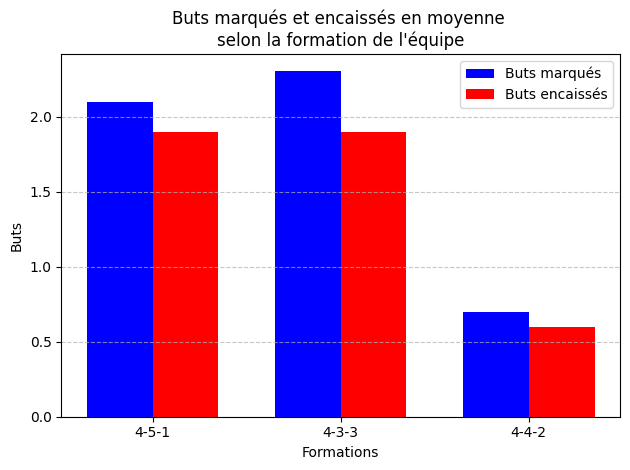

'En moyenne, les équipes ayant opté pour une formation en 4-5-1 ont marqué 2.1 buts et en on encaissé 1.9, celles ayant choisi une formation en 4-3-3 en ont marqué 2.3 et encaissé 1.9, et celles ayant préféré une formation en 4-4-2 ont marqué 0.7 buts et en ont encaissé 0.6.'

In [30]:
question9()